# Data Preparation

## Loading data

In [179]:
import pandas as pd

file_1 = pd.read_csv('reviews_0-250.csv')
file_2 = pd.read_csv('reviews_250-500.csv')
file_3 = pd.read_csv('reviews_500-750.csv')
file_4 = pd.read_csv('reviews_750-1250.csv')
file_5 = pd.read_csv('reviews_1250-end.csv')

# Concatenate the files into one DataFram
reviews_df = pd.concat([file_1, file_2, file_3, file_4, file_5], ignore_index=True)

#load products data
products_df = pd.read_csv('product_info.csv')

# Check the first few rows to understand the structure
print(products_df.head())
print(reviews_df.head())

C:\Users\cheny\AppData\Local\Temp\ipykernel_6332\1800460116.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  file_1 = pd.read_csv('reviews_0-250.csv')
C:\Users\cheny\AppData\Local\Temp\ipykernel_6332\1800460116.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  file_4 = pd.read_csv('reviews_750-1250.csv')
C:\Users\cheny\AppData\Local\Temp\ipykernel_6332\1800460116.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  file_5 = pd.read_csv('reviews_1250-end.csv')


  product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   
3    P473660       Kasbah Eau de Parfum      6342      19-69         3018   
4    P473658  Purple Haze Eau de Parfum      6342      19-69         2691   

   rating  reviews            size                      variation_type  \
0  3.6364     11.0             NaN                                 NaN   
1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
3  4.4762     21.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
4  3.2308     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value  ... online_only out_of_stock  sephora_exclusive  \
0             NaN  ...

## Handling Missing Data

In [181]:
# Check for missing values
print(products_df.isnull().sum())
print(reviews_df.isnull().sum())

# Drop rows with missing essential fields like 'product_id' or 'rating'
products_df.dropna(subset=['product_id', 'brand_name'], inplace=True)
reviews_df.dropna(subset=['rating'], inplace=True)

# Fill missing values for non-essential fields
products_df['ingredients'].fillna('Not Available')


product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64
Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_fee

0       ['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...
1       ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...
2       ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...
3       ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...
4       ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...
                              ...                        
8489    ['Talc, Synthetic Fluorphlogopite, Triethylhex...
8490    ['Alcohol, Aqua / Water / Eau, Parfum / Fragra...
8491    ['Mon Paris Eau de Parfum:', 'Alcohol, Parfum/...
8492    ['Alcohol, Parfum/Fragrance, Aqua/Water, Limon...
8493    ['Diisostearyl Malate, Bis-Behenyl/Isostearyl/...
Name: ingredients, Length: 8494, dtype: object

## Feature Engineering

In [183]:
# Calculate discount percentage
products_df['discount_percentage'] = ((products_df['price_usd'] - products_df['sale_price_usd']) / products_df['price_usd']) * 100

# Create an engagement score by combining loves_count, rating, and reviews
products_df['customer_engagement_score'] = (products_df['loves_count'] * 0.3) + (products_df['rating'] * 0.4) + (products_df['reviews'] * 0.3)

# Extract 'average_review_length' from 'review_text' in reviews
reviews_df['average_review_length'] = reviews_df['review_text'].apply(lambda x: len(str(x).split()))

# Merge reviews with products data
merged_df = pd.merge(products_df, reviews_df[['product_id', 'rating', 'review_text', 'author_id','is_recommended','skin_tone', 'eye_color', 'skin_type', 'hair_color']], on='product_id', how='left')


## Exploratory Data Analysis (EDA)

### Distribution of Ratings and Reviews

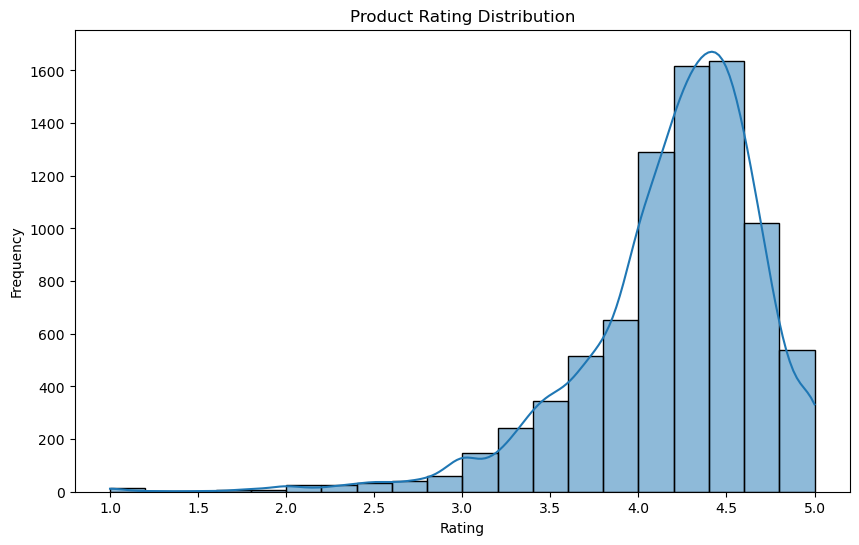

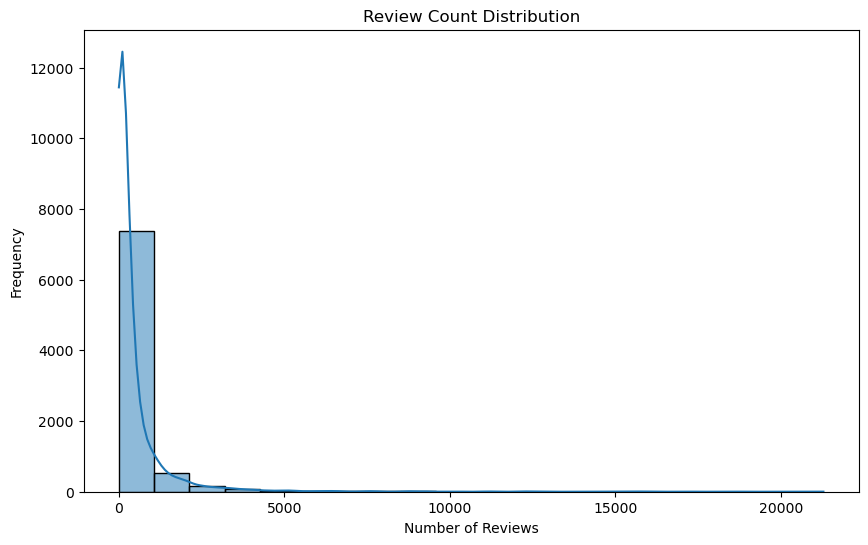

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(products_df['rating'], kde=True, bins=20)
plt.title('Product Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of reviews count
plt.figure(figsize=(10, 6))
sns.histplot(products_df['reviews'], kde=True, bins=20)
plt.title('Review Count Distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

### Correlation Heatmap

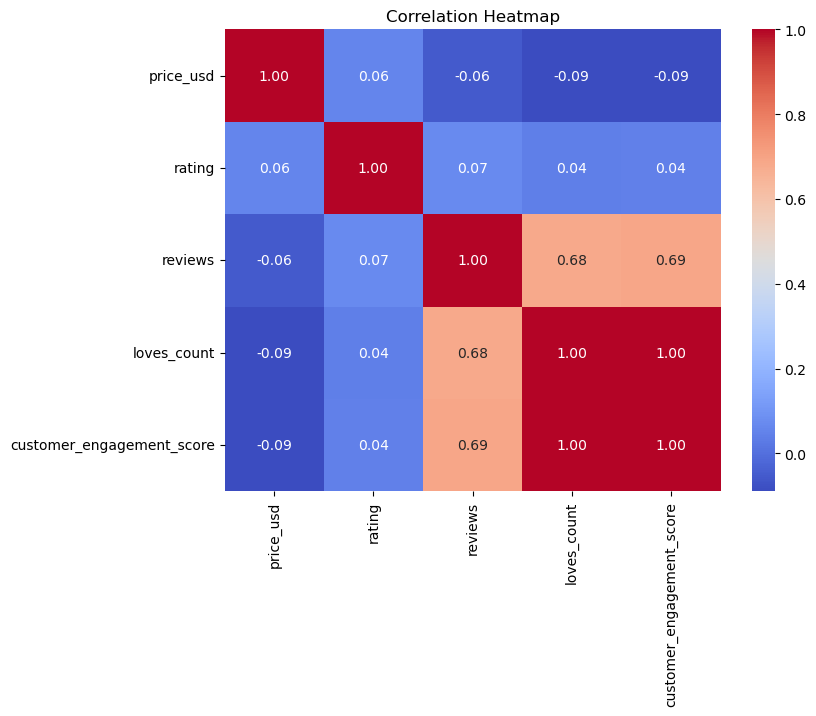

In [188]:
# Calculate correlations between numerical features
corr = products_df[['price_usd', 'rating', 'reviews', 'loves_count', 'customer_engagement_score']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Customer Segmentation

### K-Means Clustering
#### Use K-Means clustering to segment products based on engagment metrics

In [191]:
#Preprocessing for clustering(Standardization ensures all features have the same scale, preventing dominance by large-value variables.)
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['customer_engagement_score', 'rating', 'reviews', 'loves_count', 'price_usd']  

# Handle missing values (fill with median or drop if necessary)
products_df[features] = products_df[features].fillna(products_df[features].median())

# Scale the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(products_df[features])

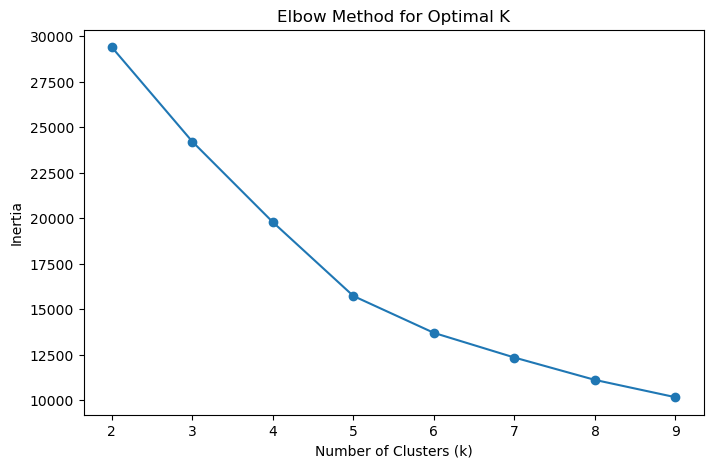

In [192]:
#Using the Elbow Method to determine the best k for K-Means

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Try different k values
inertia = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [193]:
#apply K-Menas using the optimal k from the elbow method

# Set the optimal number of clusters
optimal_k = 5  

# Fit K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
products_df['cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster distribution
print(products_df['cluster'].value_counts())


cluster
3    5611
1    1593
0     782
2     455
4      53
Name: count, dtype: int64


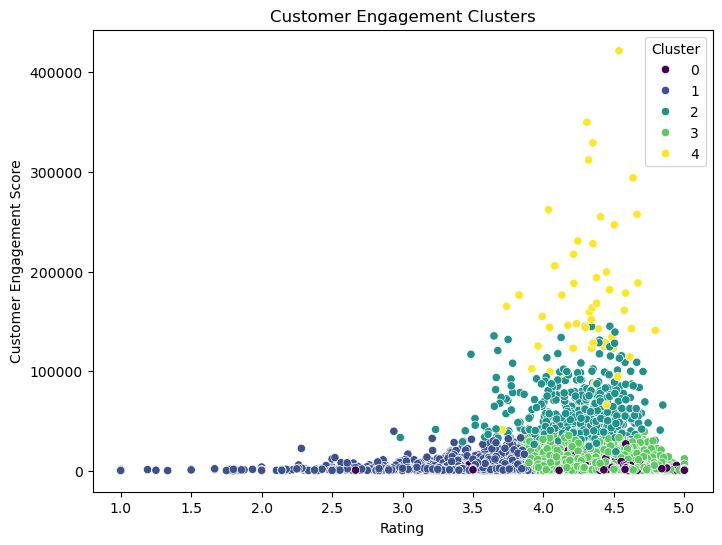

In [194]:
#2D Cluster Visulization

import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=products_df['rating'], y=products_df['customer_engagement_score'], hue=products_df['cluster'], palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Customer Engagement Score')
plt.title('Customer Engagement Clusters')
plt.legend(title='Cluster')
plt.show()

In [195]:
# Group by cluster and compute means
cluster_summary = products_df.groupby('cluster').agg({
    'customer_engagement_score': 'mean',
    'price_usd': 'mean',
    'rating': 'mean',
    'reviews': 'mean',
    'loves_count': 'mean'
}).sort_values(by='customer_engagement_score', ascending=False)

print(cluster_summary)

         customer_engagement_score   price_usd    rating      reviews  \
cluster                                                                 
4                    174147.505927   31.315094  4.321421  8559.037736   
2                     54664.784838   37.883846  4.269238  2463.200000   
3                      5755.338398   40.127667  4.400938   309.092853   
1                      4338.337649   35.223842  3.410035   136.974890   
0                      3831.377663  177.235102  4.293059   245.856777   

           loves_count  
cluster                 
4        571926.886792  
2        179747.057143  
3         18464.768312  
1         14319.603892  
0         11940.221228  


#### Optimize the cluster further 
##### After performing clustering, fine-tuned my clustering process and improve the insights gained.

##### 1. Fine-tune the Number of Clusters
   Revisit the optimal number of clusters and experiment with different k values.Tried Silhouette Score to check if the number of clusters can be improved.

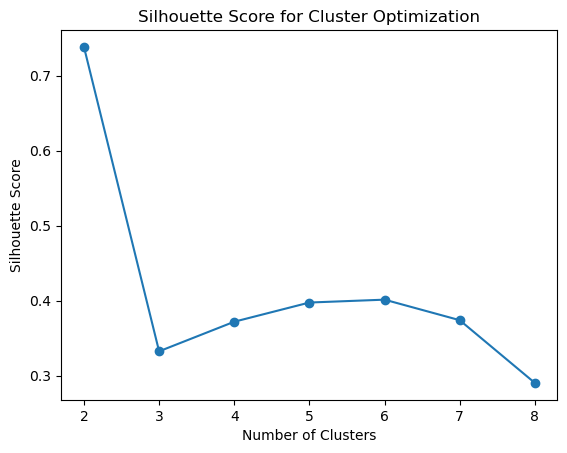

In [198]:
from sklearn.metrics import silhouette_score

# Test different cluster counts (e.g., from 2 to 8)
sil_scores = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot silhouette scores to help choose the best k
plt.plot(range(2, 9), sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Cluster Optimization')
plt.show()


##### 2. Perform Sentiment Analysis on Reviews
   The sentiment of reviews help connect customer feedback to cluster.

In [200]:
from textblob import TextBlob

def analyze_sentiment(review_text):
    # Handle NaN/missing values and convert to string
    if pd.isna(review_text):  # Check if the value is NaN
        return 'neutral'      # or return any default value you prefer
    
    # Convert to string if not already
    review_text = str(review_text)
    
    analysis = TextBlob(review_text)
    sentiment = analysis.sentiment.polarity
    
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment function to review_text
merged_df['sentiment'] = merged_df['review_text'].apply(analyze_sentiment)

# Check the sentiment distribution
print(merged_df['sentiment'].value_counts())


sentiment
positive    978322
negative     95854
neutral      26378
Name: count, dtype: int64


Link Sentiment to Clusters

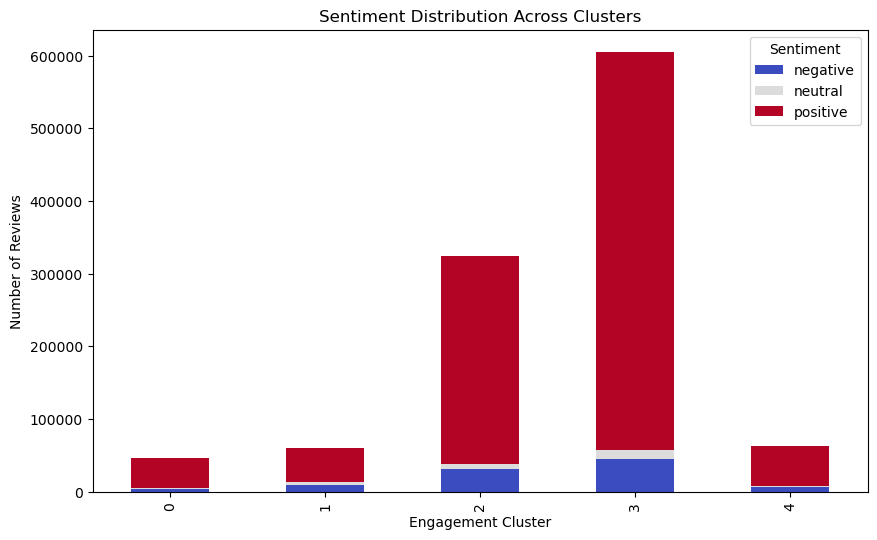

In [202]:
# Merge sentiment data with clusters
merged_df = merged_df.merge(products_df[['product_id', 'cluster']], on='product_id')

# Group by cluster and sentiment
sentiment_by_cluster = merged_df.groupby(['cluster', 'sentiment']).size().unstack()

# Visualize sentiment distribution across clusters
sentiment_by_cluster.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.xlabel('Engagement Cluster')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution Across Clusters')
plt.legend(title='Sentiment')
plt.show()


#### Advanced Analytics
##### Predictive Modeling(Logistic Regression)

In [204]:
# Import the necessary libraries
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler  # Add this import for scaling

# First, merge the products and reviews dataframes
merged_df = products_df.merge(reviews_df, on='product_id', how='inner')

# Remove rows with NaN values in the target variable
merged_df = merged_df.dropna(subset=['is_recommended'])

# Prepare the features and target
X = merged_df[['price_usd_x', 'rating_x', 'reviews', 'discount_percentage', 'customer_engagement_score']]
y = merged_df['is_recommended']

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Create a scaler object
scaler = StandardScaler()

# Split the data first to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# First, impute missing values
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Then, scale the features
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train the logistic regression model with increased max_iterations
model = LogisticRegression(max_iter=1000)  # Increased from default 100 to 1000
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.03      0.06     44386
         1.0       0.84      0.99      0.91    233541

    accuracy                           0.84    277927
   macro avg       0.68      0.51      0.49    277927
weighted avg       0.79      0.84      0.78    277927



In [205]:
import numpy as np

# Count instances of each class
class_counts = y_train.value_counts()
print("Class distribution in training data:")
print(class_counts)

# Calculate class imbalance ratio
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"Imbalance ratio: {imbalance_ratio:.2f}")

Class distribution in training data:
is_recommended
1.0    544619
0.0    103877
Name: count, dtype: int64
Imbalance ratio: 0.19


#### Plot Cluster Engagement vs. Price
Use a scatter plot to see how customer engagement and price vary across clusters.

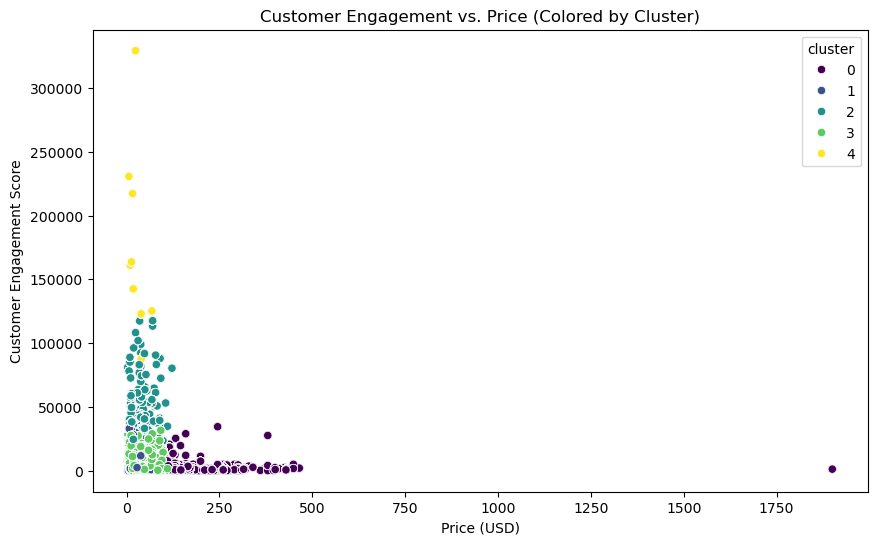

In [207]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='price_usd_x', y='customer_engagement_score', hue='cluster', palette='viridis')
plt.xlabel('Price (USD)')
plt.ylabel('Customer Engagement Score')
plt.title('Customer Engagement vs. Price (Colored by Cluster)')
plt.show()

|cluster|customer_engagement_score|price_usd|rating|reviews|loves_count|Segment Type|
|---|---|---|---|---|---|---|                                                                   
|0|3831.377663|177.235102|4.293059|245.856777|11940.221228|Luxury Buyers|  
|1|4338.337649|35.223842|3.410035|136.974890|14319.603892|Bargain Buyers|
|2|54664.784838|37.883846|4.269238|2463.200000|179747.057143|Engaged Enthusiasts|  
|3|5755.338398|40.127667|4.400938|309.092853|18464.768312|Casual Shoppers|   
|4|174147.505927|31.315094|4.321421|8559.037736|571926.886792|Loyal Brand Advocates|   
 
#### Summary of Segment Types Based on Clusters:
##### Cluster 0: Luxury Buyers
High price, good engagement, but moderate reviews.
Target with exclusive, high-end products.

##### Cluster 1: Bargain Hunters
Low price, high engagement, but low satisfaction.
Target with discounts, promotions, and value-driven marketing.

##### Cluster 2: Engaged Enthusiasts
Low price, high engagement, high satisfaction.
Offer frequent deals, upsell mid-range products.

##### Cluster 3: Casual Shoppers
Low price, moderate engagement, high satisfaction.
Engage with loyalty programs or occasional promotions.

##### Cluster 4: Loyal Brand Advocates
Low price, very high engagement and satisfaction.
Focus on building brand loyalty with rewards, referral programs, and premium offers.

#### Marketing & Inventory Actions:

##### Luxury Buyers → Offer exclusive promotions, premium services
##### Engaged Enthusiasts → Encourage social sharing, upsell high-end items
##### Bargain Hunters → Use flash sales, budget-friendly product recommendations
##### Casual Shoppers & One-Time Buyers → Convert them using personalized discounts

## Demographic Segmentation

In [212]:
# Check the distribution of skin_type and skin_tone
skin_type_distribution = merged_df['skin_type'].value_counts()
skin_tone_distribution = merged_df['skin_tone'].value_counts()

print(skin_type_distribution)
print(skin_tone_distribution)

skin_type
combination    501378
dry            174188
normal         122181
oily           109608
Name: count, dtype: int64
skin_tone
light          253405
fair           198797
lightMedium    186953
medium          70137
mediumTan       58700
fairLight       56228
tan             32443
deep            20044
rich             5493
porcelain        1612
olive            1560
dark              498
notSureST          70
ebony               3
Name: count, dtype: int64


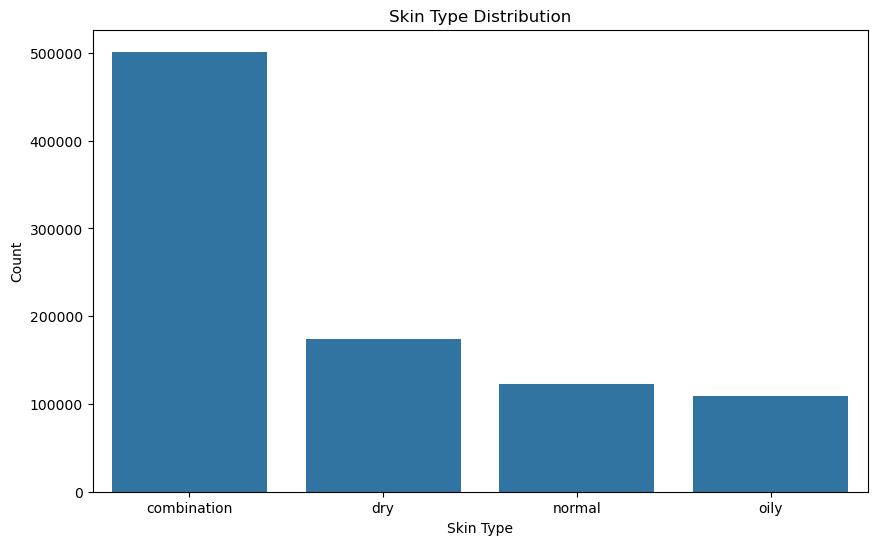

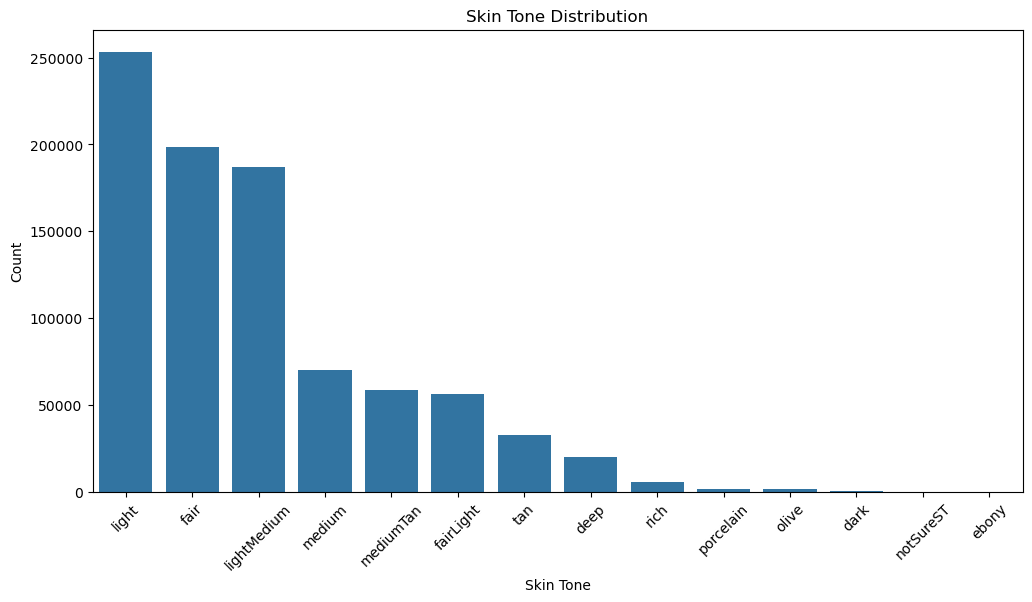

In [213]:
# Plot Skin Type Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x='skin_type', order=merged_df['skin_type'].value_counts().index)
plt.title('Skin Type Distribution')
plt.xlabel('Skin Type')
plt.ylabel('Count')
plt.show()

# Plot Skin Tone Distribution
plt.figure(figsize=(12,6))
sns.countplot(data=merged_df, x='skin_tone', order=merged_df['skin_tone'].value_counts().index)
plt.title('Skin Tone Distribution')
plt.xlabel('Skin Tone')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### Combine Segments(Skin Type + Skin Tone)

In [215]:
merged_df['demographic_segment'] = merged_df['skin_type'] + " - " + merged_df['skin_tone']

In [216]:
# Convert the 'demographic_segment' column to string and handle NaN values
merged_df['demographic_segment'] = merged_df['demographic_segment'].astype(str)

# Filter out 'notSureST' from the 'demographic_segment' column
merged_df = merged_df[~merged_df['demographic_segment'].str.contains('notSureST', na=False)]

# Verify the change by checking the counts
print(merged_df['demographic_segment'].value_counts())


demographic_segment
combination - light          139457
combination - fair           108986
combination - lightMedium    105632
dry - light                   50314
dry - fair                    43299
nan                           41930
combination - medium          39657
normal - light                36024
combination - mediumTan       33307
dry - lightMedium             31302
combination - fairLight       28631
oily - light                  27221
normal - fair                 26972
normal - lightMedium          25880
oily - lightMedium            23878
oily - fair                   19148
combination - tan             17839
dry - fairLight               15414
dry - medium                  11161
combination - deep            10765
oily - medium                 10072
normal - medium                9137
dry - mediumTan                8873
oily - mediumTan               8774
normal - mediumTan             7664
normal - fairLight             6294
oily - tan                     5947
oily - f

In [217]:
# Check rows where 'demographic_segment' is NaN
print(merged_df[merged_df['demographic_segment'].isna()].head())

Empty DataFrame
Columns: [product_id, product_name_x, brand_id, brand_name_x, loves_count, rating_x, reviews, size, variation_type, variation_value, variation_desc, ingredients, price_usd_x, value_price_usd, sale_price_usd, limited_edition, new, online_only, out_of_stock, sephora_exclusive, highlights, primary_category, secondary_category, tertiary_category, child_count, child_max_price, child_min_price, discount_percentage, customer_engagement_score, cluster, Unnamed: 0, author_id, rating_y, is_recommended, helpfulness, total_feedback_count, total_neg_feedback_count, total_pos_feedback_count, submission_time, review_text, review_title, skin_tone, eye_color, skin_type, hair_color, product_name_y, brand_name_y, price_usd_y, average_review_length, demographic_segment]
Index: []

[0 rows x 50 columns]


In [218]:
# Check for 'nan' or other non-null string representations of NaN
print(merged_df[merged_df['demographic_segment'] == 'nan'].shape[0])

41930


In [219]:
import numpy as np

# Replace 'nan' string with actual NaN
merged_df['demographic_segment'] = merged_df['demographic_segment'].replace('nan', np.nan)

# fill with a default value
merged_df['demographic_segment'] = merged_df['demographic_segment'].fillna('Unknown')

In [220]:
print(merged_df['demographic_segment'].value_counts())

demographic_segment
combination - light          139457
combination - fair           108986
combination - lightMedium    105632
dry - light                   50314
dry - fair                    43299
Unknown                       41930
combination - medium          39657
normal - light                36024
combination - mediumTan       33307
dry - lightMedium             31302
combination - fairLight       28631
oily - light                  27221
normal - fair                 26972
normal - lightMedium          25880
oily - lightMedium            23878
oily - fair                   19148
combination - tan             17839
dry - fairLight               15414
dry - medium                  11161
combination - deep            10765
oily - medium                 10072
normal - medium                9137
dry - mediumTan                8873
oily - mediumTan               8774
normal - mediumTan             7664
normal - fairLight             6294
oily - tan                     5947
oily - f

##### Analyze Customer Behavior Across Demographic Segments
analyze the customer engagement score, ratings, reviews, and loves_count across these new demographic segments.

In [222]:
# Group by demographic segment to see how engagement and other metrics vary
demographic_analysis = merged_df.groupby('demographic_segment').agg({
    'customer_engagement_score': 'mean',
    'rating_x': 'mean',
    'reviews': 'mean',
    'loves_count': 'mean'
}).reset_index()

# Sort by customer engagement score to find high-engagement segments
demographic_analysis = demographic_analysis.sort_values(by='customer_engagement_score', ascending=False)

# Display the analysis
print(demographic_analysis)

          demographic_segment  customer_engagement_score  rating_x  \
26              normal - dark               66755.281115  4.330447   
36         normal - porcelain               50611.198228  4.244196   
14                 dry - dark               45839.443426  4.332831   
49           oily - porcelain               45647.014985  4.260677   
23            dry - porcelain               45510.655286  4.284146   
35             normal - olive               44211.929590  4.175424   
28             normal - ebony               43155.592600  4.481500   
10        combination - olive               42192.744442  4.264867   
39                oily - dark               41737.772556  4.299444   
11    combination - porcelain               39599.264848  4.303987   
42                oily - fair               37773.341980  4.270686   
48               oily - olive               37525.541709  4.281873   
40                oily - deep               37388.264908  4.287269   
51                 o

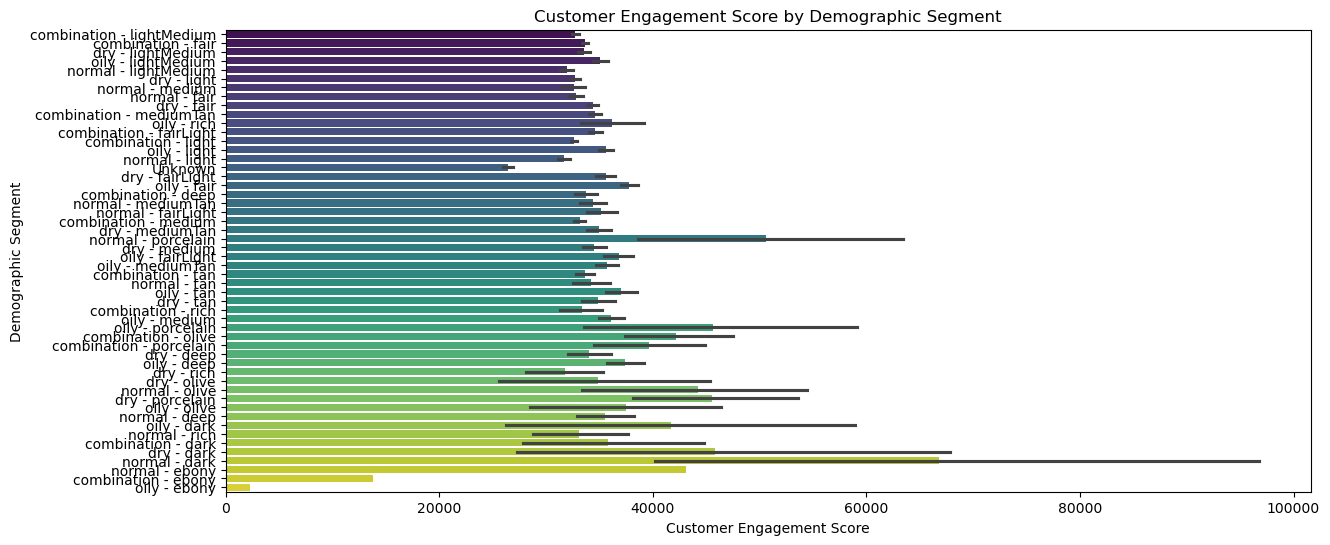

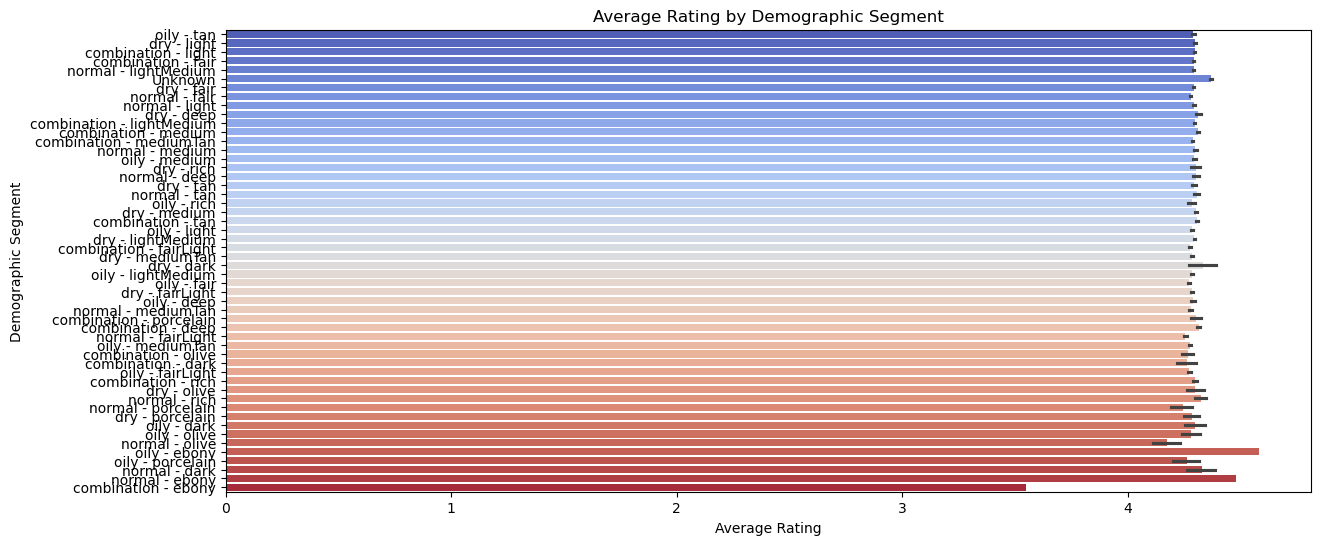

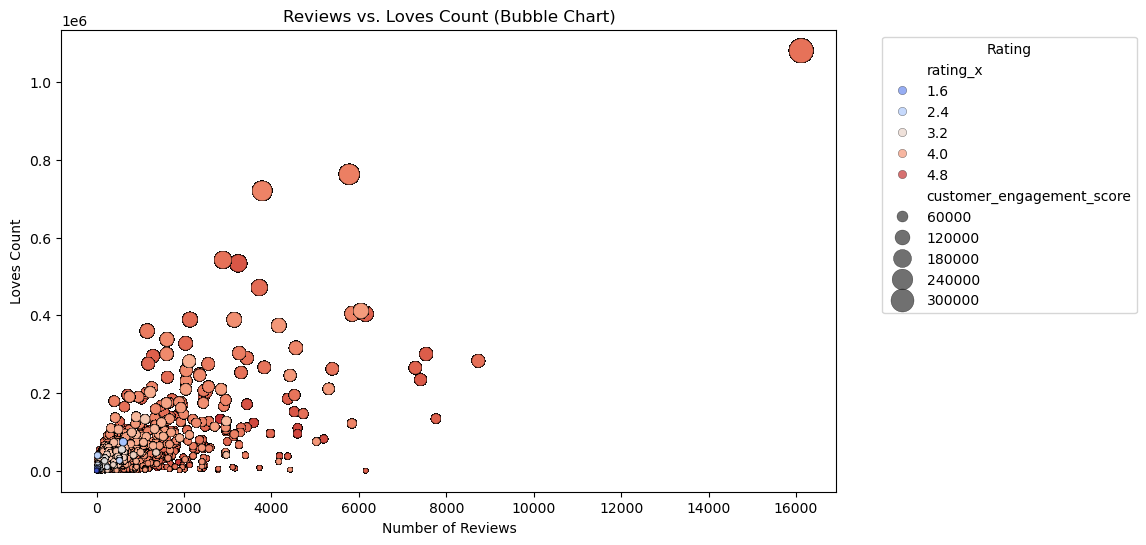

In [223]:
# Set figure size
plt.figure(figsize=(14, 6))
merged_df = merged_df.sort_values(by="customer_engagement_score", ascending=False)

# 1. Customer Engagement Score by Demographic Segment
sns.barplot(x="customer_engagement_score", y="demographic_segment", data=merged_df, hue="demographic_segment", palette="viridis", legend=False)
plt.xlabel("Customer Engagement Score")
plt.ylabel("Demographic Segment")
plt.title("Customer Engagement Score by Demographic Segment")
plt.show()

# 2. Average Rating by Demographic Segment
plt.figure(figsize=(14, 6))
merged_df = merged_df.sort_values(by="rating_x", ascending=False)
sns.barplot(x="rating_x", y="demographic_segment", data=merged_df, hue="demographic_segment", palette="coolwarm", legend=False)
plt.xlabel("Average Rating")
plt.ylabel("Demographic Segment")
plt.title("Average Rating by Demographic Segment")
plt.show()

# 3. Reviews vs. Loves Count (Bubble Chart)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="reviews", y="loves_count", size="customer_engagement_score", hue="rating_x", 
                data=merged_df, sizes=(10, 300), palette="coolwarm", edgecolor="black", alpha=0.7)
plt.xlabel("Number of Reviews")
plt.ylabel("Loves Count")
plt.title("Reviews vs. Loves Count (Bubble Chart)")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Analysis of the Demographic Segments Based on Engagement Metrics
| |demographic_segment|customer_engagement_score|rating_x|reviews|loves_count|
|---|---|---|---|---|---|
|26|normal - dark|66755.281115|4.330447|4111.872340|218399.957447|
|36|normal - porcelain|50611.198228|4.244196|3286.302198|165412.032967|  
|14|dry - dark|45839.443426|4.332831||3186.647059|149605.720588|
|49|oily - porcelain|45647.014985|4.260677|3078.720238|149072.315476|
|23|dry - porcelain|45510.655286|4.284146|3099.660465|148596.811628|
|35|normal - olive|44211.929590|4.175424|2908.280193|144459.251208|
|28|normal - ebony|43155.592600|4.481500|1836.000000|142010.000000|
|10|combination - olive|42192.744442|4.264867|2932.900763|137703.894220|
|39|oily - dark|41737.772556|4.299444|2918.851852|136201.324074|
|11|combination - porcelain|39599.264848|4.303987|2910.055422|129081.755422|
|42|oily - fair|37773.341980|4.270686|2211.730572|123693.715114|
|48|oily - olive|37525.541709|4.281873|2738.330317|122341.099548|
|40|oily - deep|37388.264908|4.287269|2195.755944|122426.077389|
|51|oily - tan|36992.750895|4.290639|2145.680343|121157.768455|
|43|oily - fairLight|36800.345322|4.271893|2138.028566|120524.093317|
|50|oily - rich|36222.459130|4.283360|2123.512857|118612.306429|
|46|oily - medium|36113.993802|4.294399|2147.988781|118226.264694|
|1|combination - dark|35838.948928|4.261006|2534.145985|116923.335766|
|47|oily - mediumTan|35692.456111|4.275735|2107.719968|116861.432756|
|44|oily - light|35611.078434|4.284527|2116.303663|116581.578414|
|17|dry - fairLight|35576.550504|4.286487|2138.468600|116444.317763|
|27|normal - deep|35485.933265|4.302189|2086.782405|116193.925560|
|30|normal - fairLight|35170.007443|4.255023|2141.232126|115086.452653|
|45|oily - lightMedium|35079.525271|4.285662|2103.061354|114822.975333|
|21|dry - mediumTan|34978.603707|4.284824|2077.648484|114511.984109|
|22|dry - olive|34850.779993|4.299983|2859.604762|113303.928571|
|25|dry - tan|34824.088991|4.293995|2055.125839|114019.445470|
|5|combination - fairLight|34614.195114|4.275926|2126.798994|113248.150152|
|9|combination - mediumTan|34602.229196|4.287254|2100.321434|113234.726214|
|20|dry - medium|34531.232474|4.302380|2101.021503|112997.350237|
|34|normal - mediumTan|34433.227060|4.279907|2085.156446|112686.560543|
|16|dry - fair|34407.139950|4.292125|2087.528511|112597.215155|
|38|normal - tan|34228.025669|4.305140|2077.339356|112010.339356|
|15|dry - deep|34040.474758|4.311634|2059.087500|111403.412847|
|2|combination - deep|33705.946141|4.314516|2050.655829|110296.745286|
|4|combination - fair|33659.994994|4.292578|2082.946920|110111.312958|
|13|combination - tan|33650.130591|4.309085|2040.570155|110120.786367|
|19|dry - lightMedium|33533.505138|4.294976|2024.962015|109747.661811|
|12|combination - rich|33339.351764|4.297977|2064.271324|109061.170588|
|8|combination - medium|33137.524955|4.311668|2046.941347|108405.726278|
|37|normal - rich|33058.990694|4.325164|2013.005545|108177.863216|
|29|normal - fair|32828.334915|4.278671|2044.723973|107377.354182|
|7|combination - lightMedium|32756.645001|4.296208|2052.248078|107130.840314|
|18|dry - light|32729.535404|4.298079|2010.587550|107082.133025|
|6|combination - light|32642.475710|4.297031|2030.552421|106771.970572|
|33|normal - medium|32589.462901|4.299667|2023.357886|106602.452227|
|32|normal - lightMedium|31938.953019|4.291976|1989.091422|104468.362674|
|24|dry - rich|31755.180976|4.301292|1931.704958|103913.163241|
|31|normal - light|31721.764869|4.293585|1991.850877|103741.640573|
|0|Unknown|26405.078255|4.368402|1597.748319|86413.354663|
|3|combination - ebony|13756.119000|3.547500|316.000000|45533.000000|
|41|oily - ebony|2271.332720|4.581800|55.000000|7510.000000|


##### 1. The 'Unknown' Segment
The "Unknown" demographic segment has the lowest customer engagement score.
However, its rating is still relatively high, suggesting that the products reviewed by these customers are well-rated despite lower engagement.
The number of reviews and loves_count are also among the lowest, indicating this segment may have missing data or includes users who do not disclose their demographic information.
##### 2. High-Engagement Demographics
The highest customer engagement score is found in "normal - dark", followed by "normal - porcelain" and "dry - dark".
These high-engagement groups also tend to have high review counts and loves_count, meaning customers from these demographics are more engaged with the brand.
##### 3. Skin Tones with the Highest Ratings
The highest average rating is seen in "oily - ebony", followed by "normal - ebony".
This suggests that, while these groups have lower engagement (fewer reviews and loves), they are more satisfied with the products they use.
##### 4. Skin Types with the Lowest Engagement
The "combination - ebony" and "oily - ebony" segments have the lowest customer engagement scores.
They also have the lowest number of reviews, meaning these groups are significantly underrepresented in the dataset.
##### 5. The Most Popular Segments
"normal - dark," "normal - porcelain," and "dry - dark" appear to be the most engaged customer segments based on customer engagement scores.
These groups have a high number of reviews and loves, suggesting they are key customer segments for marketing efforts.

#### For High-Engagement Groups
##### ✅ Target with Loyalty & Retargeting Campaigns
###### Normal-Dark, Oily-Porcelain, Dry-Dark customers engage a lot. 
###### Offer exclusive discounts, subscriptions, or early access to new products.

##### ✅ Feature These Segments in Ads & Content
###### Use testimonials, social proof, or influencers from these segments.

#### For Low-Engagement or Underrepresented Groups
##### 🔍 Investigate the Market Gap
###### The Ebony and Dark categories have fewer users but high ratings.
###### Are there fewer products available for them?
###### Do marketing images mostly show lighter skin tones?
###### 💡 Action: Introduce more diverse product ranges & representation.

#### For Low-Rated Segments (e.g., Combination - Ebony)
##### 🚀 Find the Pain Points
###### Conduct sentiment analysis on reviews.
###### Identify common complaints (e.g., shade mismatch, texture issues).
###### Improve product descriptions and recommendations.


## Product Preference Segmentation

#### Transform the Data:
Create a frequency table of customers per product category and brand. This helps identify how many customers prefer each category and brand.

In [227]:
# Group by customer and product category
category_preference = merged_df.groupby(['author_id', 'primary_category']).size().unstack(fill_value=0)

# Group by customer and brand
brand_preference = merged_df.groupby(['author_id', 'brand_name_x']).size().unstack(fill_value=0)



#### Standardize the Data for Clustering

In [229]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

category_preference_scaled = scaler.fit_transform(category_preference)
brand_preference_scaled = scaler.fit_transform(brand_preference)


#### Perform Clustering

In [231]:
# Step 1: Perform clustering on the aggregated customer preferences
# Assuming category_preference and brand_preference are the aggregated DataFrames
category_preference_scaled = scaler.fit_transform(category_preference)
brand_preference_scaled = scaler.fit_transform(brand_preference)

# Perform clustering
kmeans_category = KMeans(n_clusters=5, random_state=42)
category_labels = kmeans_category.fit_predict(category_preference_scaled)

kmeans_brand = KMeans(n_clusters=5, random_state=42)
brand_labels = kmeans_brand.fit_predict(brand_preference_scaled)

# Step 2: Create a DataFrame with customer_id and cluster labels
category_clusters_df = pd.DataFrame({
    'author_id': category_preference.index,
    'category_cluster': category_labels
})

brand_clusters_df = pd.DataFrame({
    'author_id': brand_preference.index,
    'brand_cluster': brand_labels
})

# Step 3: Merge the cluster labels back to the original `merged_df`
merged_df = merged_df.merge(category_clusters_df, on='author_id', how='left')
merged_df = merged_df.merge(brand_clusters_df, on='author_id', how='left')




In [232]:
# Average primary category for each cluster
category_clusters = merged_df.groupby('category_cluster')['primary_category'].agg(lambda x: x.mode()[0])

# Average brand name for each cluster
brand_clusters = merged_df.groupby('brand_cluster')['brand_name_x'].agg(lambda x: x.mode()[0])

print(category_clusters)
print(brand_clusters)


category_cluster
0    Skincare
1    Skincare
2    Skincare
3    Skincare
4    Skincare
Name: primary_category, dtype: object
brand_cluster
0        Lancôme
1    Glow Recipe
2         Tatcha
3          Prima
4      BeautyBio
Name: brand_name_x, dtype: object


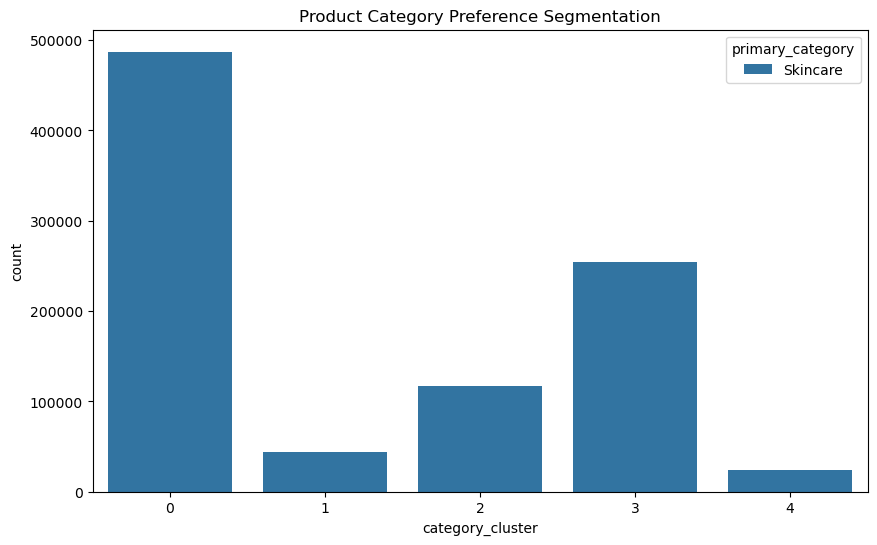

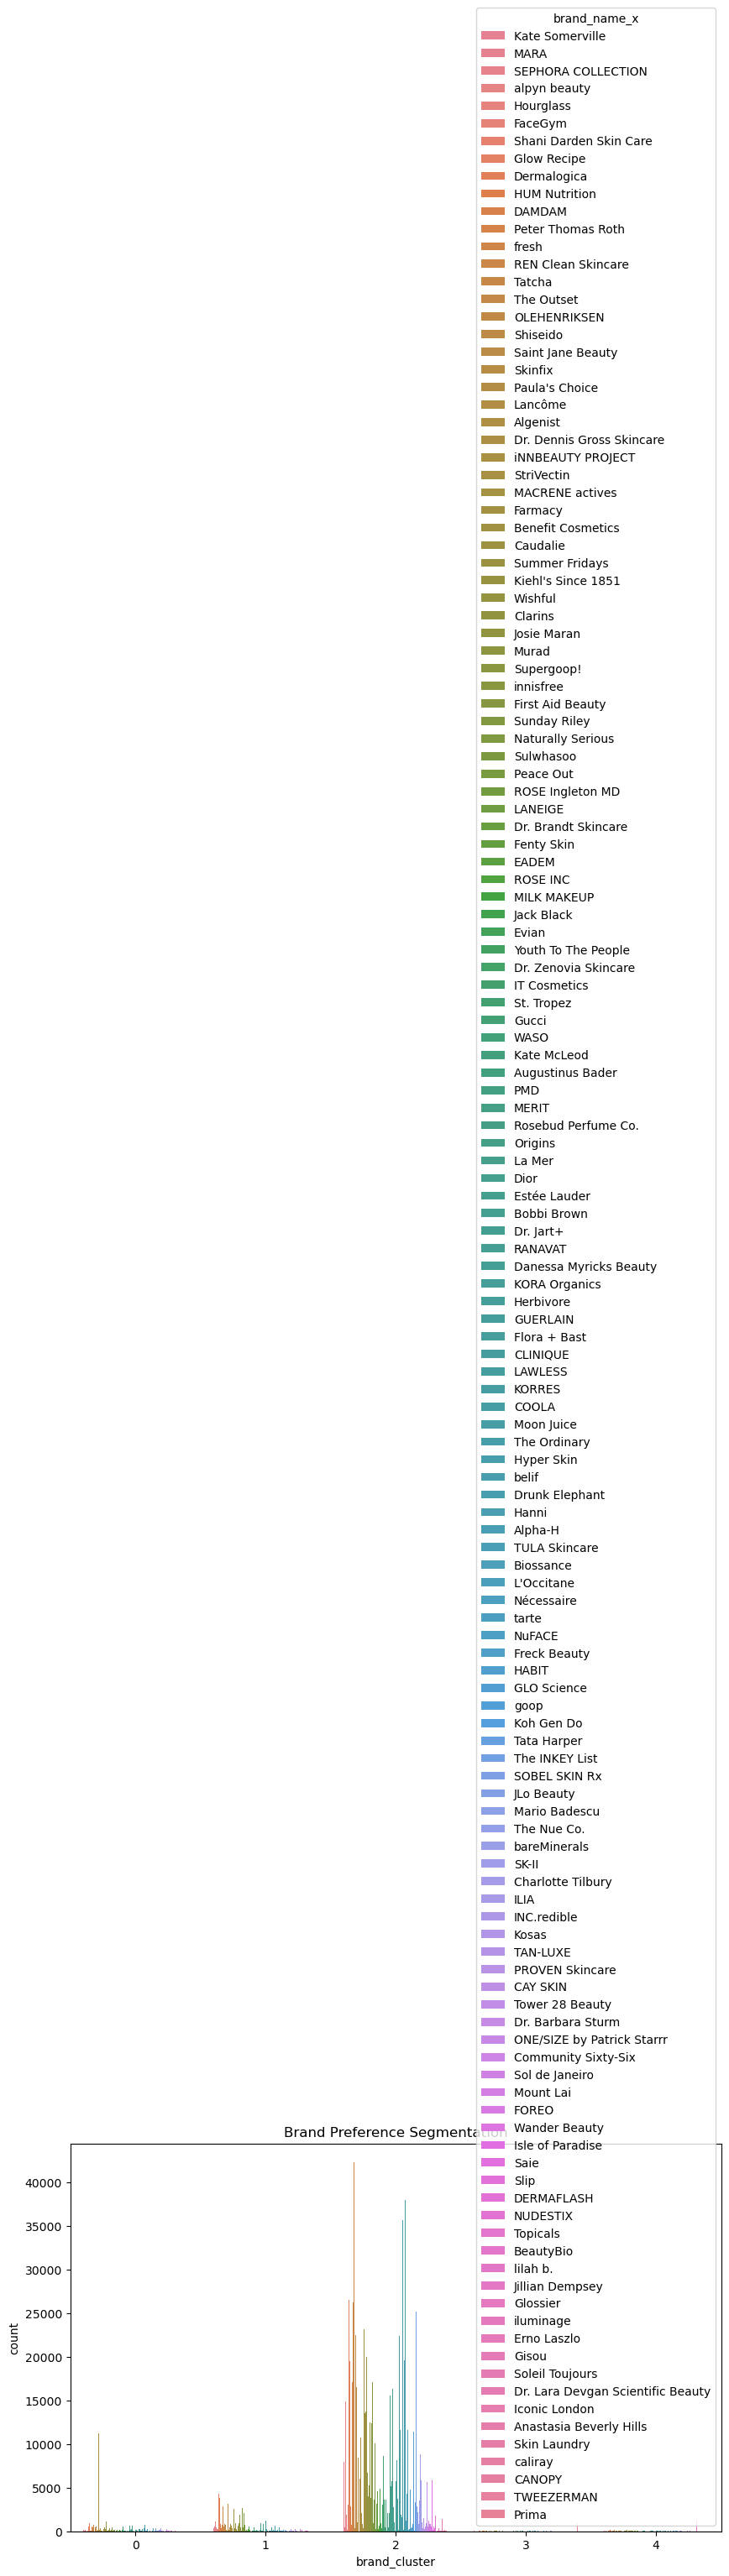

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize category preference clusters
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='category_cluster', hue='primary_category')
plt.title('Product Category Preference Segmentation')
plt.show()

# Visualize brand preference clusters
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='brand_cluster', hue='brand_name_x')
plt.title('Brand Preference Segmentation')
plt.show()


#### Combining Segments for Further Clustering

In [235]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Select numerical columns from merged_df for scaling (you can modify based on your needs)
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Scale the numerical features
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(merged_df[numerical_cols])

# Step 3: Handle missing values by applying SimpleImputer (optional but recommended if there are missing values)
imputer = SimpleImputer(strategy='most_frequent')  # Or choose another strategy like 'mean', 'median', etc.
combined_scaled_imputed = imputer.fit_transform(combined_scaled)

# Step 4: Perform clustering (e.g., KMeans) on the imputed data
final_kmeans = KMeans(n_clusters=5, random_state=42)
merged_df['final_cluster'] = final_kmeans.fit_predict(combined_scaled_imputed)

# Optionally: View the updated DataFrame with cluster labels
print(merged_df[['product_id', 'final_cluster']].head())


  product_id  final_cluster
0    P480176              2
1    P505316              2
2    P505316              2
3    P505316              2
4    P505316              2


In [236]:
# Analyze the cluster assignment
final_cluster_analysis = merged_df.groupby('final_cluster').agg({
    'primary_category': lambda x: x.mode()[0],  # Get the most frequent category
    'brand_name_x': lambda x: x.mode()[0]  # Get the most frequent brand
})

print(final_cluster_analysis)


              primary_category    brand_name_x
final_cluster                                 
0                     Skincare         LANEIGE
1                     Skincare  Drunk Elephant
2                     Skincare     Dermalogica
3                     Skincare          Tatcha
4                     Skincare    Estée Lauder


##### Targeted Marketing: 
Tailor marketing campaigns for each cluster, targeting customers who prefer brands like CLINIQUE, Tatcha, or Shiseido.

##### Product Recommendations: 
By associating products in the same cluster, recommend products with similar characteristics (e.g., skincare products from similar brands) to customers.

##### Inventory Management: 
Prioritize stock for the most popular clusters (like skincare with CLINIQUE and Tatcha).

### Preference Analysis

#### Product Attribute Preferences
##### Analyzing highlights and ingredients to identify the most popular labels or ingredients.

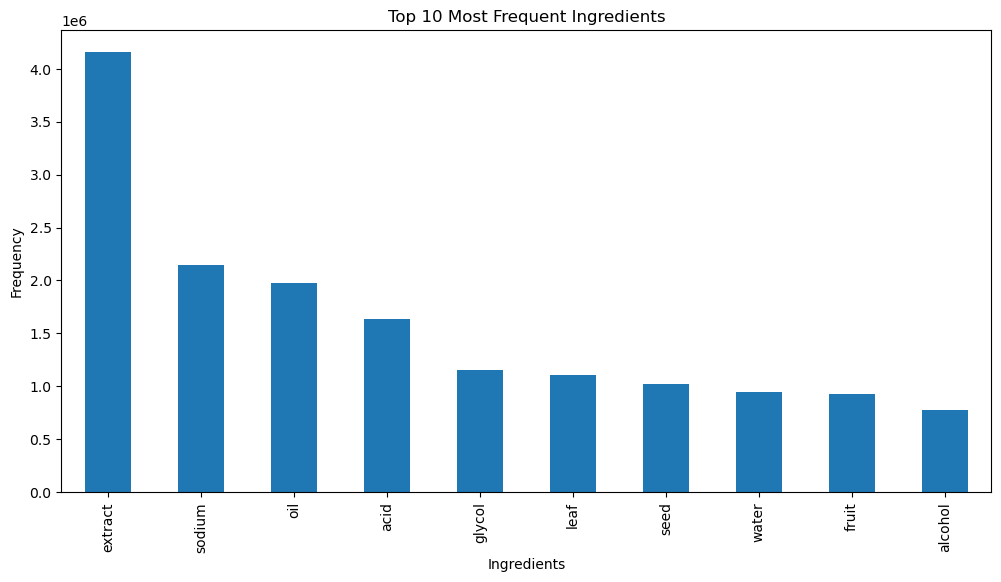

In [240]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Extract ingredients from the dataset
ingredients = merged_df['ingredients'].dropna() 

# Convert ingredients into a list of words
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=20)  # You can adjust ngram_range and max_features

# Fit the vectorizer and transform the ingredients text
X = vectorizer.fit_transform(ingredients)

# Get the frequency of words
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Plot the most frequent ingredients
word_freq.sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Most Frequent Ingredients')
plt.ylabel('Frequency')
plt.xlabel('Ingredients')
plt.show()


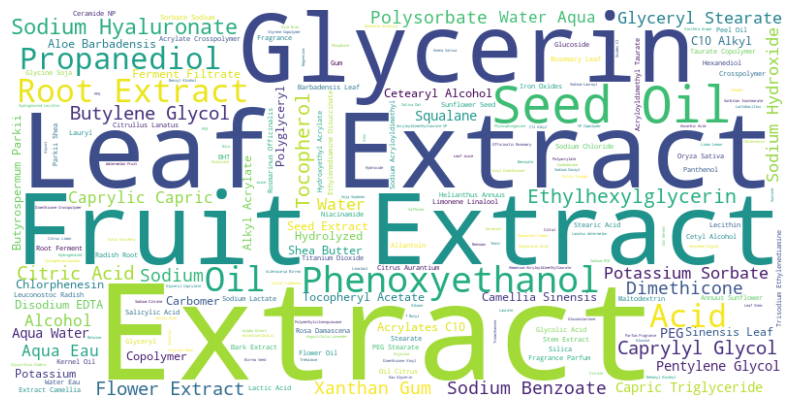

In [241]:
from collections import Counter

# Count word frequencies in ingredients
word_counts = Counter(ingredients)

# Select the top N most common words
top_words = [word for word, _ in word_counts.most_common(100)]  # Limit to top 100 words

# Generate the word cloud with the top words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



##### Analyze highlights

In [243]:
print(products_df['highlights'].head(20))  # Check the first 20 rows


0     ['Unisex/ Genderless Scent', 'Warm &Spicy Scen...
1     ['Unisex/ Genderless Scent', 'Layerable Scent'...
2     ['Unisex/ Genderless Scent', 'Layerable Scent'...
3     ['Unisex/ Genderless Scent', 'Layerable Scent'...
4     ['Unisex/ Genderless Scent', 'Layerable Scent'...
5     ['Warm &Spicy Scent', 'Unisex/ Genderless Scen...
6     ['Unisex/ Genderless Scent', 'Layerable Scent'...
7     ['Unisex/ Genderless Scent', 'allure 2022 Best...
8     ['Fresh Scent', 'Layerable Scent', 'Unisex/ Ge...
9     ['Unisex/ Genderless Scent', 'allure 2022 Best...
10    ['Unisex/ Genderless Scent', 'Layerable Scent'...
11    ['Unisex/ Genderless Scent', 'Layerable Scent'...
12    ['Fresh Scent', 'Unisex/ Genderless Scent', 'L...
13    ['Unisex/ Genderless Scent', 'Layerable Scent'...
14    ['Clean at Sephora', 'Hydrating', 'Good for: D...
15    ['Good for: Dryness', 'Clean at Sephora', 'Hyd...
16    ['Good for: Dryness', 'Clean at Sephora', 'Hyd...
17    ['Clean at Sephora', 'Hydrating', 'Good fo

In [244]:
print(products_df['highlights'].dropna().apply(type).value_counts())
print(products_df['highlights'].isna().sum(), "missing values")


highlights
<class 'str'>    6287
Name: count, dtype: int64
2207 missing values


In [245]:
import ast

def clean_highlights(x):
    if pd.isna(x):  # Handle NaN values
        return []
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except (ValueError, SyntaxError):
        return []  # Return an empty list for invalid entries

# Apply cleaning function
products_df['highlights'] = products_df['highlights'].apply(clean_highlights)

# Verify after cleaning
print(products_df['highlights'].head(10))


0    [Unisex/ Genderless Scent, Warm &Spicy Scent, ...
1    [Unisex/ Genderless Scent, Layerable Scent, Wa...
2    [Unisex/ Genderless Scent, Layerable Scent, Wo...
3    [Unisex/ Genderless Scent, Layerable Scent, Wa...
4    [Unisex/ Genderless Scent, Layerable Scent, Wo...
5    [Warm &Spicy Scent, Unisex/ Genderless Scent, ...
6    [Unisex/ Genderless Scent, Layerable Scent, Wo...
7    [Unisex/ Genderless Scent, allure 2022 Best of...
8    [Fresh Scent, Layerable Scent, Unisex/ Genderl...
9    [Unisex/ Genderless Scent, allure 2022 Best of...
Name: highlights, dtype: object


In [246]:
from collections import Counter

# Flatten the lists
all_highlights = [tag for sublist in products_df['highlights'] for tag in sublist]

# Count occurrences
highlight_counts = Counter(all_highlights)

# Display the top 10 most common highlights
print("Top 10 Highlights:")
for tag, count in highlight_counts.most_common(10):
    print(f"{tag}: {count}")


Top 10 Highlights:
Vegan: 2623
Cruelty-Free: 1775
Clean at Sephora: 1534
Without Parabens: 1414
Good for: Dryness: 1221
Hydrating: 1170
Good for: Dullness/Uneven Texture: 913
Without Sulfates SLS & SLES: 818
All Hair Types: 763
Long-wearing: 715


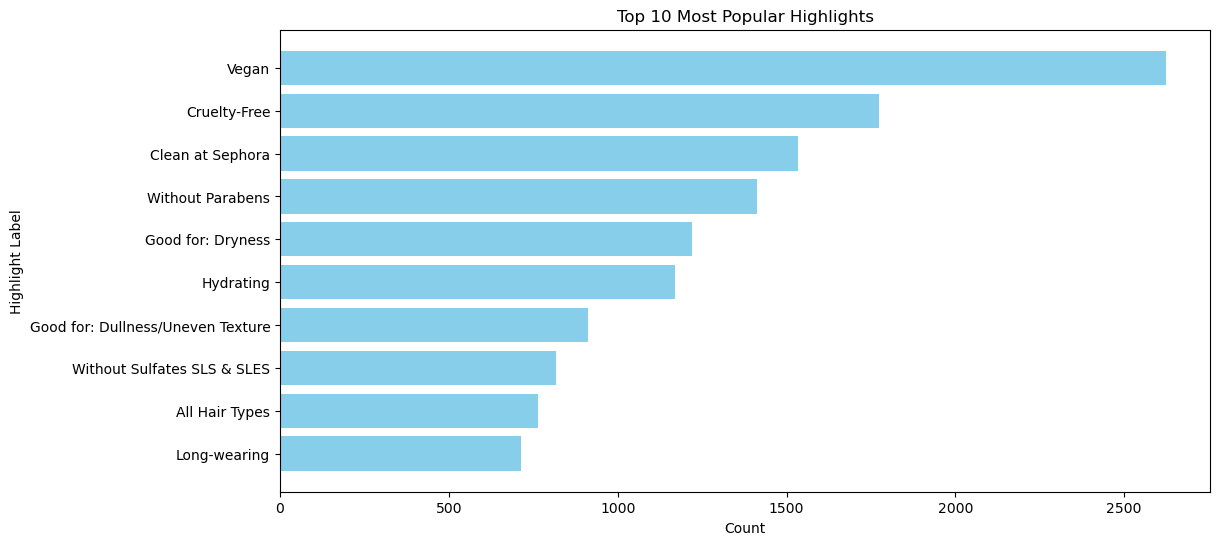

In [247]:
import matplotlib.pyplot as plt

# Convert to DataFrame for visualization
highlight_df = pd.DataFrame(highlight_counts.most_common(10), columns=['Highlight', 'Count'])

# Plot the data
plt.figure(figsize=(12,6))
plt.barh(highlight_df['Highlight'], highlight_df['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Highlight Label')
plt.title('Top 10 Most Popular Highlights')
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.show()


#### Implications for Marketing and Product Development:
##### Natural Ingredients Are Key
The word cloud highlights Extracts (Leaf, Fruit, Root), Glycerin, and Seed Oils as dominant ingredients.
Indicates a strong consumer preference for plant-based and moisturizing components.
##### Clean & Ethical Beauty Trends Drive Demand
The bar chart shows Vegan and Cruelty-Free as the top product highlights.
Suggests ethical and clean beauty is a major deciding factor for customers.
##### Moisturizing and Skin Health Attributes Are Important
Highlights like Hydrating, Good for Dryness, and Without Parabens reinforce a focus on skin-friendly formulations.

#### Recommendations:
##### Brands should emphasize natural, ethical, and skin-nourishing attributes in their product marketing.
##### Formulations featuring clean, hydrating, and plant-based ingredients will likely continue to dominate the market.


#### Association Rule Analysis
##### Examining variation_type and variation_value to identify the most preferred product variations.

In [250]:
!pip install mlxtend

In [251]:
from mlxtend.frequent_patterns import apriori, association_rules

# Create a dataframe for the Apriori algorithm (dummy encode variation_type and variation_value)
df_variations = merged_df[['variation_type', 'variation_value']]

# Convert variations into a one-hot encoded format
df_encoded = pd.get_dummies(df_variations)

# Apply Apriori to find frequent item sets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the top rules
print(rules.sort_values('lift', ascending=False).head(10))


                         antecedents                       consequents  \
0         (variation_value_Original)            (variation_type_Color)   
1             (variation_type_Color)        (variation_value_Original)   
13             (variation_type_Size)  (variation_value_1.35 oz/ 40 mL)   
28             (variation_type_Size)    (variation_value_5 oz/ 150 mL)   
27             (variation_type_Size)  (variation_value_3.4 oz/ 100 mL)   
26  (variation_value_3.4 oz/ 100 mL)             (variation_type_Size)   
25             (variation_type_Size)     (variation_value_2 oz/ 60 mL)   
24     (variation_value_2 oz/ 60 mL)             (variation_type_Size)   
21             (variation_type_Size)  (variation_value_1.7 oz / 50 mL)   
20  (variation_value_1.7 oz / 50 mL)             (variation_type_Size)   

    antecedent support  consequent support   support  confidence       lift  \
0             0.021150            0.051241  0.019617    0.927521  18.101255   
1             0.051241     

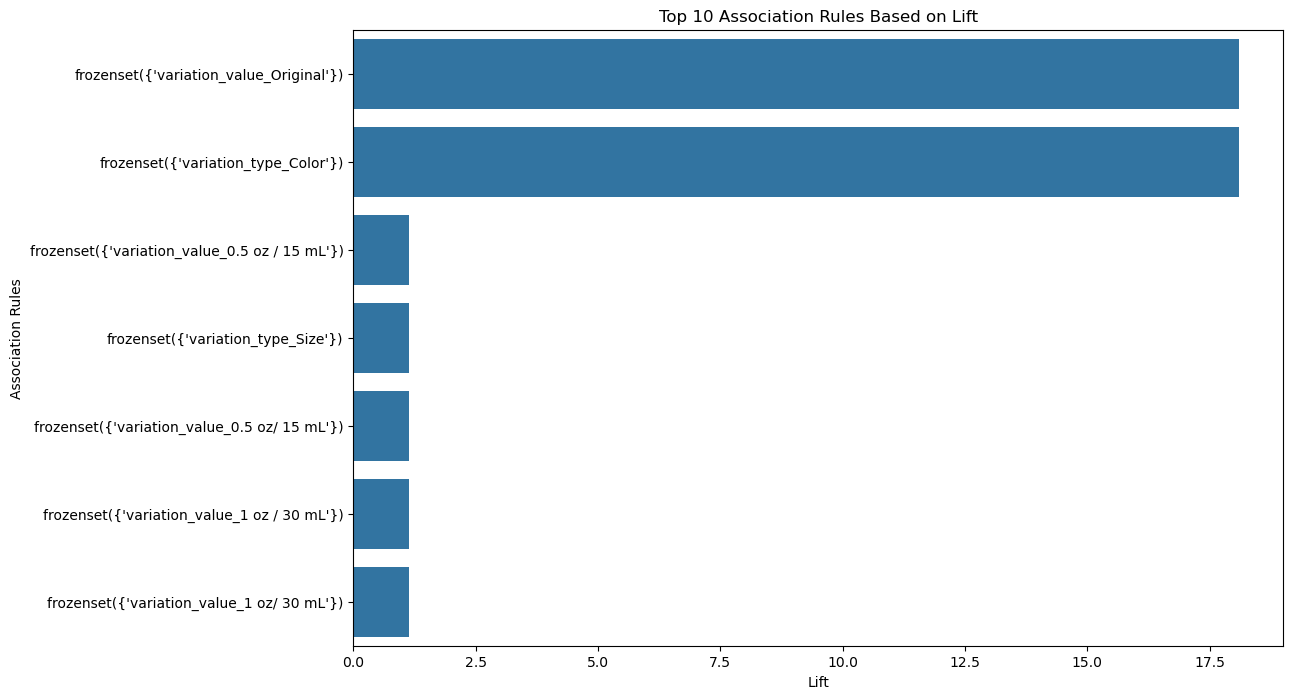

In [252]:
# Plot the top 10 most interesting rules based on lift
plt.figure(figsize=(12, 8))
sns.barplot(x='lift', y='antecedents', data=rules.head(10))
plt.title('Top 10 Association Rules Based on Lift')
plt.xlabel('Lift')
plt.ylabel('Association Rules')
plt.show()


##### Top Strongest Rules Based on Lift & Confidence

###### Here are the most significant association rules:

###### 1️⃣ Variation "Original" → Variation Type "Color"
###### Confidence: 92.75% → Very strong likelihood
###### Lift: 18.10 → Very strong association
###### Interpretation:
###### If a product has the variation "Original," it is 14.38 times more likely to belong to a color category compared to random chance. This suggests "Original" is heavily linked to color selection.
###### 2️⃣ Variation Type "Color" → Variation "Original"
###### Confidence: 38.28% → Moderate strength
###### Lift: 18.10 → Strong association
###### Interpretation:
###### If a product has the variation type "Color," there is a 29.5% chance it belongs to the "Original" variation. The lift value suggests a strong correlation between these categories.
###### 3️⃣ Variation "2 oz/ 60 mL" → Variation Type "Size"
###### Confidence: 100% → Perfect relationship
###### Lift: 1.12 → Weak to moderate association
###### Interpretation:
###### Every time the variation "2 oz/ 60 mL" appears, it always belongs to the "Size" variation type. However, the lift value (1.14) suggests this is not a highly unique or surprising finding.
###### 4️⃣ Variation "1.35 oz/ 40 mL" → Variation Type "Size"
###### Confidence: 100% → Perfect relationship
###### Lift: 1.12 → Weak to moderate association
###### Interpretation:
###### Similar to the previous rule, this confirms that all products labeled "1.35 oz/ 40 mL" belong to the "Size" category. Expected but not highly impactful.
###### Key Business Insights
###### ✅ Color and “Original” Variation are strongly linked → If a product is tagged as "Original," it is highly likely to have a color variation. This suggests that "Original" may be a default option for color-based variations.

###### ✅ Size variations are perfectly predictable → All products with sizes like "2 oz" or "1.35 oz" are always categorized under the "Size" variation type. This can help in automatic categorization of new products.

###### ✅ Reinforce Color Variation Marketing → Given the strong relationship between "Original" and "Color," it may be beneficial to focus marketing strategies on color variations rather than size-based options.

###### Actionable Strategies:
###### Enhance Product Categorization
###### Automate variation type classification (e.g., size, color) based on frequent item sets.
###### Optimize search filters on the website by emphasizing color-based selections.
###### Personalized Marketing for Color Variations
###### Highlight "Original" variations in targeted promotions since they are strongly linked to color.
###### Use A/B testing to determine the best way to promote color-based variations.
###### Refine Inventory Management
###### Prioritize stocking "Original" variations with high color association.
###### Forecast demand trends based on strong variation relationships.
###### Leverage Insights for New Product Development
###### Develop color-centric product lines based on the strong "Original" and "Color" association.
###### Focus on introducing new shades or color variations to match customer preferences.



In [303]:
merged_df.to_csv("D:\ITD 214/cleaned_dataset.csv", index=False)

<>:1: DeprecationWarning: invalid escape sequence '\I'
<>:1: DeprecationWarning: invalid escape sequence '\I'
C:\Users\cheny\AppData\Local\Temp\ipykernel_6332\4232638140.py:1: DeprecationWarning: invalid escape sequence '\I'
  merged_df.to_csv("D:\ITD 214/cleaned_dataset.csv", index=False)
